# Explore here

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [15]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
serie = df['sales'] 

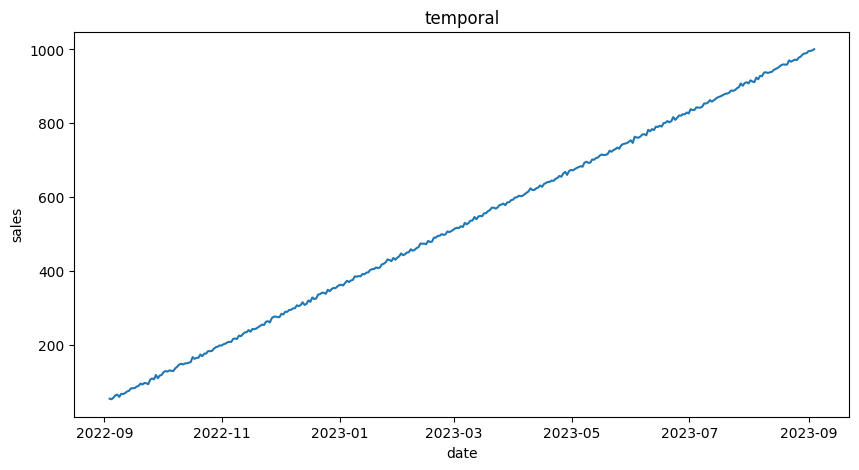

In [21]:
plt.figure(figsize=(10,5))
plt.plot(serie)
plt.xlabel('date')
plt.ylabel('sales')
plt.title('temporal')
plt.show()


In [22]:
print("Tensor:", serie.shape)
print("media", serie.mean())
print("varianza:", serie.var())
print("Variabilidad:", serie.std())

Tensor: (366,)
media 524.963967941629
varianza: 75674.34195561547
Variabilidad: 275.08969801796553


Entrena un ARIMA

In [24]:
serie = df['sales']

train_size = int(len(serie) * 0.8)
train, test = serie[:train_size], serie[train_size:]

In [28]:
modelo = ARIMA(train, order=(1, 1, 1))
modelo_fit = modelo.fit()

c:\Users\juanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\juanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\juanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -838.552
Date:                Sun, 13 Jul 2025   AIC                           1683.104
Time:                        19:34:53   BIC                           1694.124
Sample:                    09-03-2022   HQIC                          1687.518
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    427.818      0.000       0.995       1.005
ma.L1         -0.9990      0.806     -1.240      0.215      -2.578       0.580
sigma2        18.3647     14.790      1.242      0.2

In [31]:
pred = modelo_fit.forecast(steps=len(test))

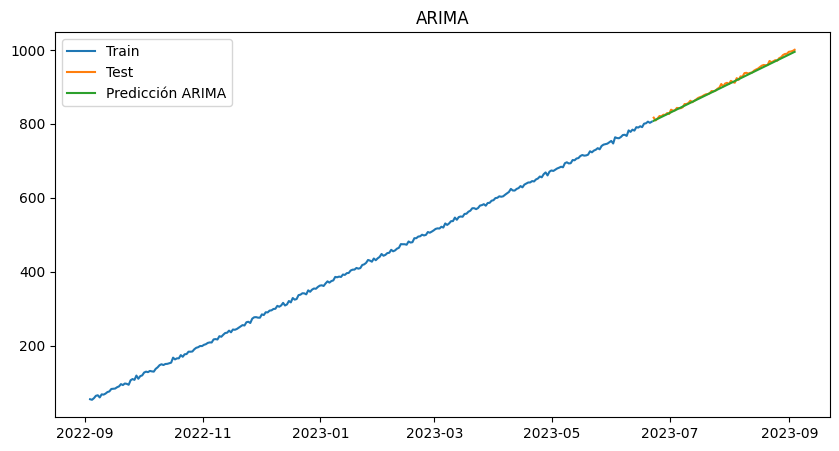

In [33]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred, label='Predicción ARIMA')
plt.legend()
plt.title('ARIMA')
plt.show()

COmparar los puntos reales vs predictivos

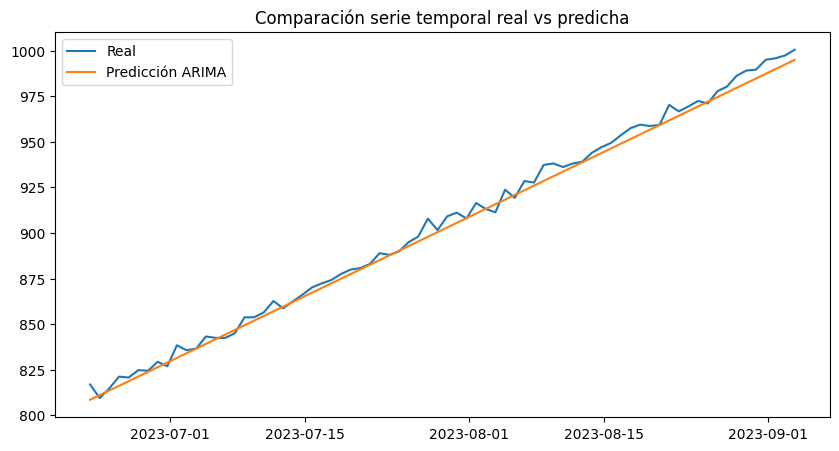

In [34]:
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Real')
plt.plot(test.index, pred, label='Predicción ARIMA')
plt.legend()
plt.title('Comparación serie temporal real vs predicha')
plt.show()


In [39]:
mse = mean_squared_error(test, pred)
mae = mean_absolute_error(test, pred)
print(f"Error cuadratico medio : {mse:.2f}")
print(f"Error absoluto : {mae:.2f}")

Error cuadratico medio : 16.75
Error absoluto : 3.31
